train shape: (120, 4)
test shape: (30, 4)


Text(0.5, 1.0, 'SVC with linear kernel\nAccuracy:0.97')

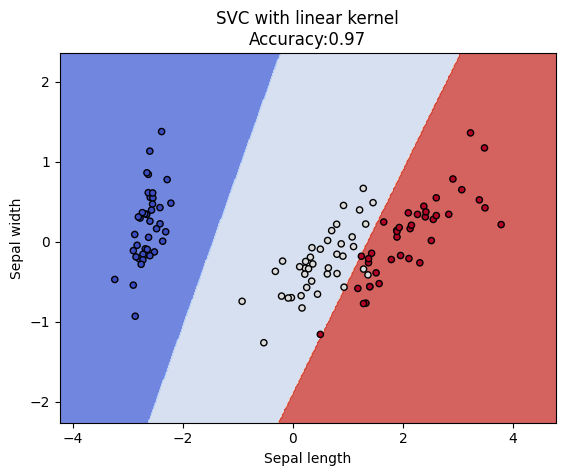

In [9]:
import pandas as pd # 製作 table 相關
import numpy as np # 維度陣列與矩陣運算
import matplotlib.pyplot as plt # 繪圖用
import seaborn as sns
# seaborn 套件是以 matplotlib 為基礎建構的高階繪圖套件，讓使用者更加輕鬆地建立圖表
from sklearn.datasets import load_iris # 引入 iris 資料集


iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

df_data # 看一下整理好的資料



from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)





def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)


from sklearn import svm

# 建立 kernel='linear' 模型
svcModel=svm.SVC(kernel='linear', C=1)
# 使用訓練資料訓練模型
svcModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted=svcModel.predict(train_reduced)
# 計算準確率
accuracy = svcModel.score(train_reduced, y_train)

X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svcModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVC with linear kernel'+ '\n' + 'Accuracy:%.2f'%accuracy)


Epoch 0, Error: 0.4979272420431271
Epoch 1000, Error: 0.4902206783708861
Epoch 2000, Error: 0.4308126742694146
Epoch 3000, Error: 0.3351517070015572
Epoch 4000, Error: 0.19942405206348796
Epoch 5000, Error: 0.12423408593602969
Epoch 6000, Error: 0.09020839268392006
Epoch 7000, Error: 0.07195218582621574
Epoch 8000, Error: 0.06064795262696704
Epoch 9000, Error: 0.052937221621858106
Trained weights for W1: [[-2.64844912  5.60821765  4.4889052   2.53503931]
 [ 5.06929746  5.76345182 -1.62756049  1.88234747]]
Trained weights for W2: [[-5.20030448]
 [ 8.62884655]
 [-4.55614748]
 [-4.30711899]]


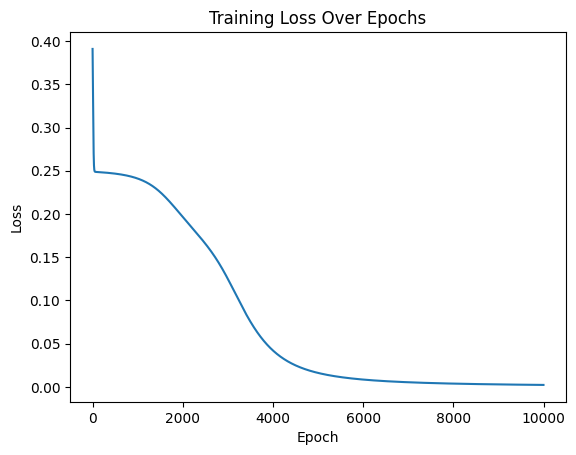

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 激活函數及其導數（Sigmoid）
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 訓練數據（X: 輸入，y: 標籤）
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR 問題

# 初始化權重
input_layer_neurons = X.shape[1]  # 輸入層神經元數量
hidden_layer_neurons = 4         # 隱藏層神經元數量
output_layer_neurons = 1         # 輸出層神經元數量

# 隨機初始化權重
W1 = np.random.rand(input_layer_neurons, hidden_layer_neurons)  # 輸入層到隱藏層的權重
b1 = np.random.rand(1, hidden_layer_neurons)  # 隱藏層偏置
W2 = np.random.rand(hidden_layer_neurons, output_layer_neurons)  # 隱藏層到輸出層的權重
b2 = np.random.rand(1, output_layer_neurons)  # 輸出層偏置

# 學習率
learning_rate = 0.1

# 儲存每個 epoch 的損失值
losses = []

# 訓練過程
for epoch in range(10000):
    # 前向傳播
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    predicted_output = sigmoid(output_layer_input)

    # 計算損失（均方誤差）
    error = y - predicted_output
    loss = np.mean(np.square(error))  # 均方誤差
    losses.append(loss)  # 儲存損失

    # 反向傳播（反向計算每層的梯度）
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(W2.T) * sigmoid_derivative(hidden_layer_output)

    # 更新權重和偏置
    W2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate  # 更新W2
    b2 += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate  # 更新b2
    W1 += X.T.dot(error_hidden_layer) * learning_rate  # 更新W1
    b1 += np.sum(error_hidden_layer, axis=0, keepdims=True) * learning_rate  # 更新b1

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Error: {np.mean(np.abs(error))}')

# 顯示最終訓練結果
print("Trained weights for W1:", W1)
print("Trained weights for W2:", W2)

# 繪製損失曲線
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()
